## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

### This solution is divided into following parts:



<ol>
<li>Data Reading and Understanding</li>
<li>Data Visualization and Data cleaning</li>
<li>Transform and split into train and test sets.</li>
<li>Model building on unbalanced data</li>
<li>Random oversampling and model building</li>
<li>SMOTE oversampling and model building</li>
<li>ADASYN oversampling and model building</li>
<li>Final Analysis and Conclusion</li>
</ol>

## 1. Data Reading and Understanding

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

We have 284807 records and 31 features in our dataset.

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## 2. Data visualization and Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

There are no null columns present in the dataset, hence no missing value treatment is needed.

Additionally data types for features are consistent so no conversion is needed.

<b> Let's observe the distribution of features present in the dataset. </b>

In [6]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

([<matplotlib.patches.Wedge at 0x294568e7d00>,
 [Text(-1.09998380137016, 0.0059696501784341355, 'normal_share'),
  Text(1.0999838018177286, -0.005969567707642625, 'fraud_share')])

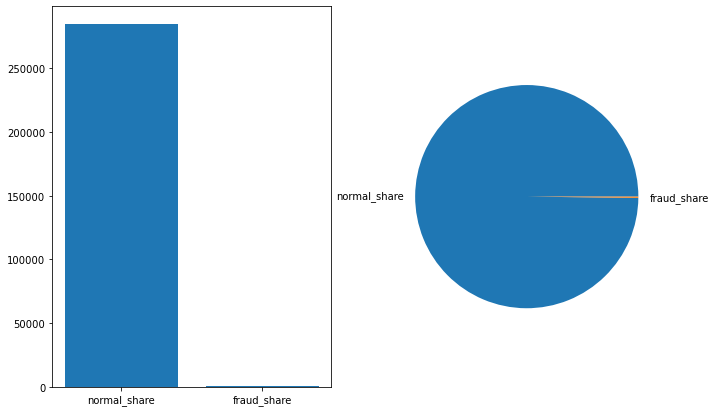

In [7]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(11, 7))
axs1.bar(['normal_share', 'fraud_share'], [classes[0], classes[1]])
axs2.pie(df.Class.value_counts(), labels = ['normal_share', 'fraud_share'])

Dataset is highly imbalanced as there are very few records corresponding to fraudelent transaction. So accuracy score to evaluate our classification algorithm will not be correct in this scenario.

Let's observe the transactions distribution with time.

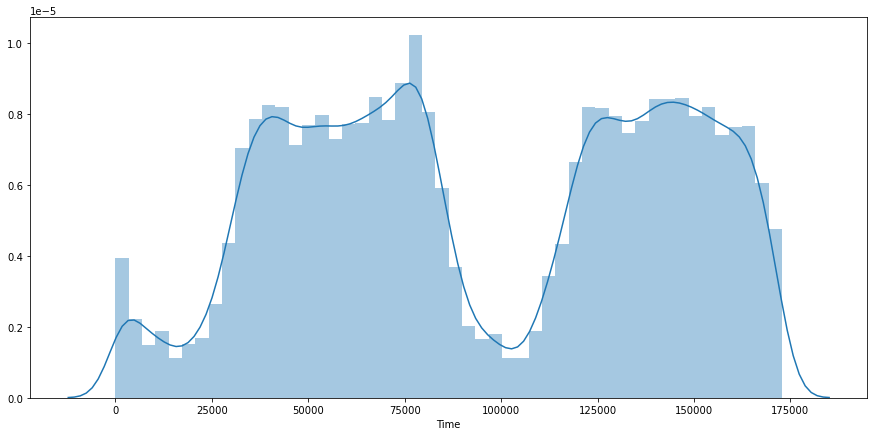

In [8]:
plt.figure(figsize=(15,7))
df['Time'] = df['Time']/60*60
sns.distplot(df.Time)

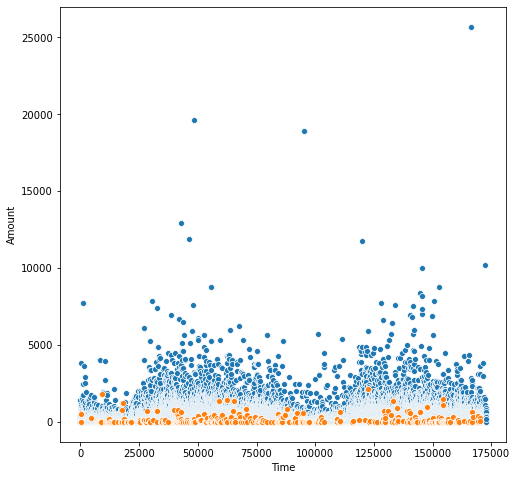

In [9]:
## Scatter plot between amount and time.
df_nonfraud = df[df.Class == 0]
df_fraud = df[df.Class == 1]

fig = plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Time', y = 'Amount', data= df_nonfraud)
sns.scatterplot(x = 'Time', y = 'Amount', data= df_fraud)
plt.show()

KDE plot to visualize the distribution of Amount.

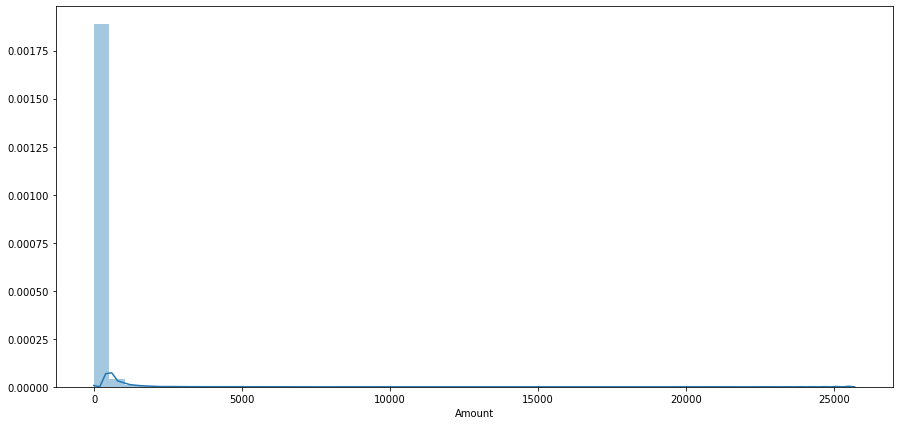

In [10]:
plt.figure(figsize=(15,7))
sns.distplot(df.Amount)

Box Plot of amount for both classes.

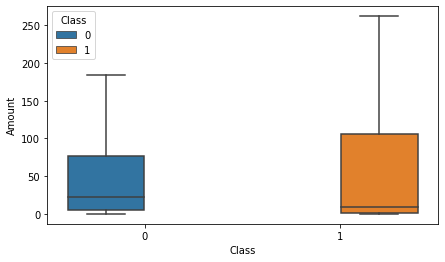

In [11]:
plt.figure(figsize=(7,4))
a = sns.boxplot(x = 'Class', y = 'Amount', hue = 'Class', data= df, showfliers=False)

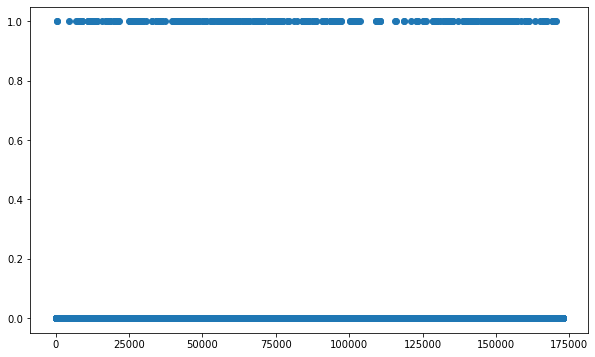

In [12]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=(10,6))
plt.scatter(df['Time'], df['Class'])

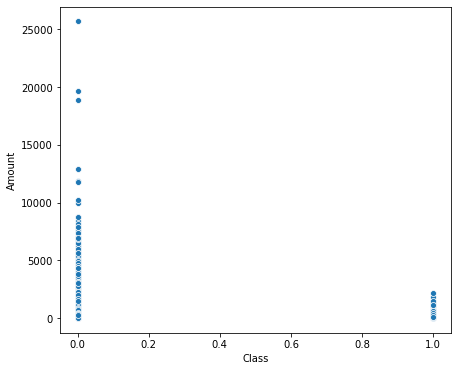

In [13]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(7, 6))
sns.scatterplot(x='Class', y='Amount', data = df)

Most of the fraudulent transaction happened have transaction amout less than 2500.

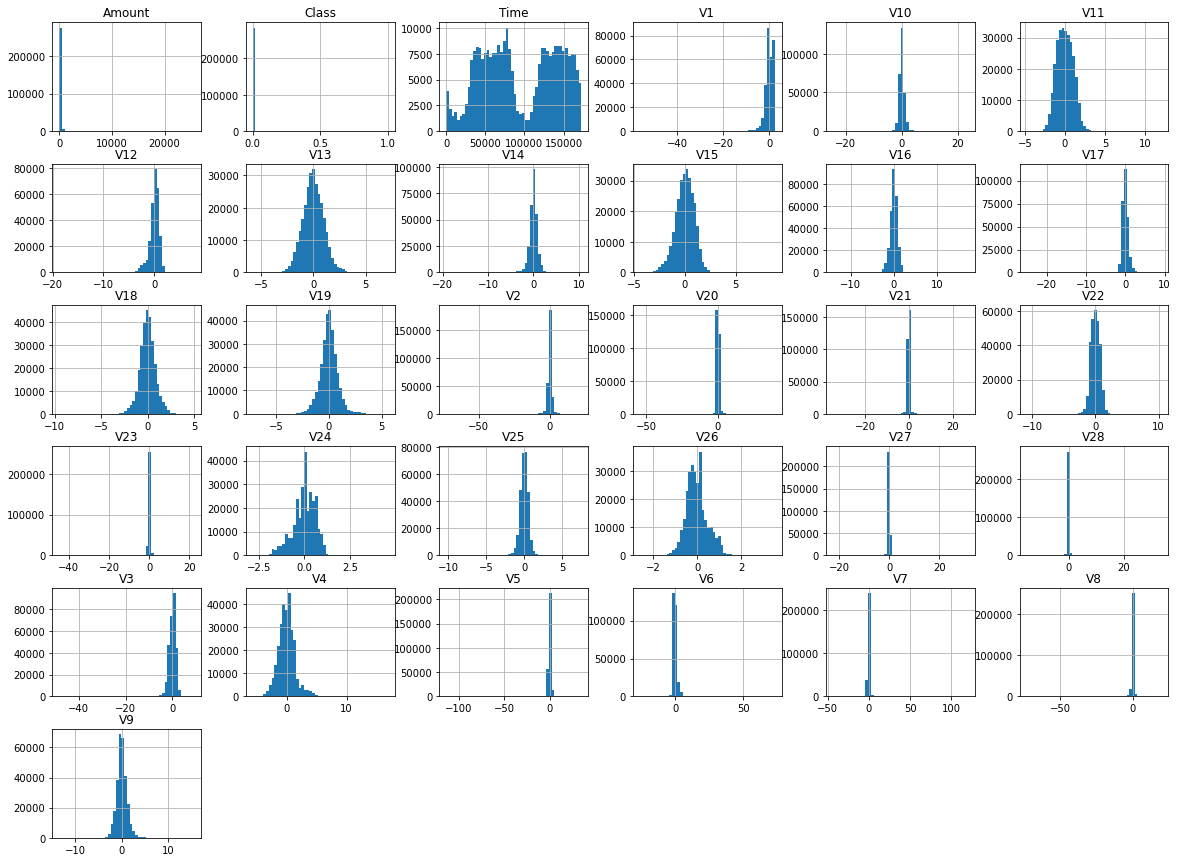

In [14]:
df.hist(bins = 50, figsize = (20,15))
plt.show()

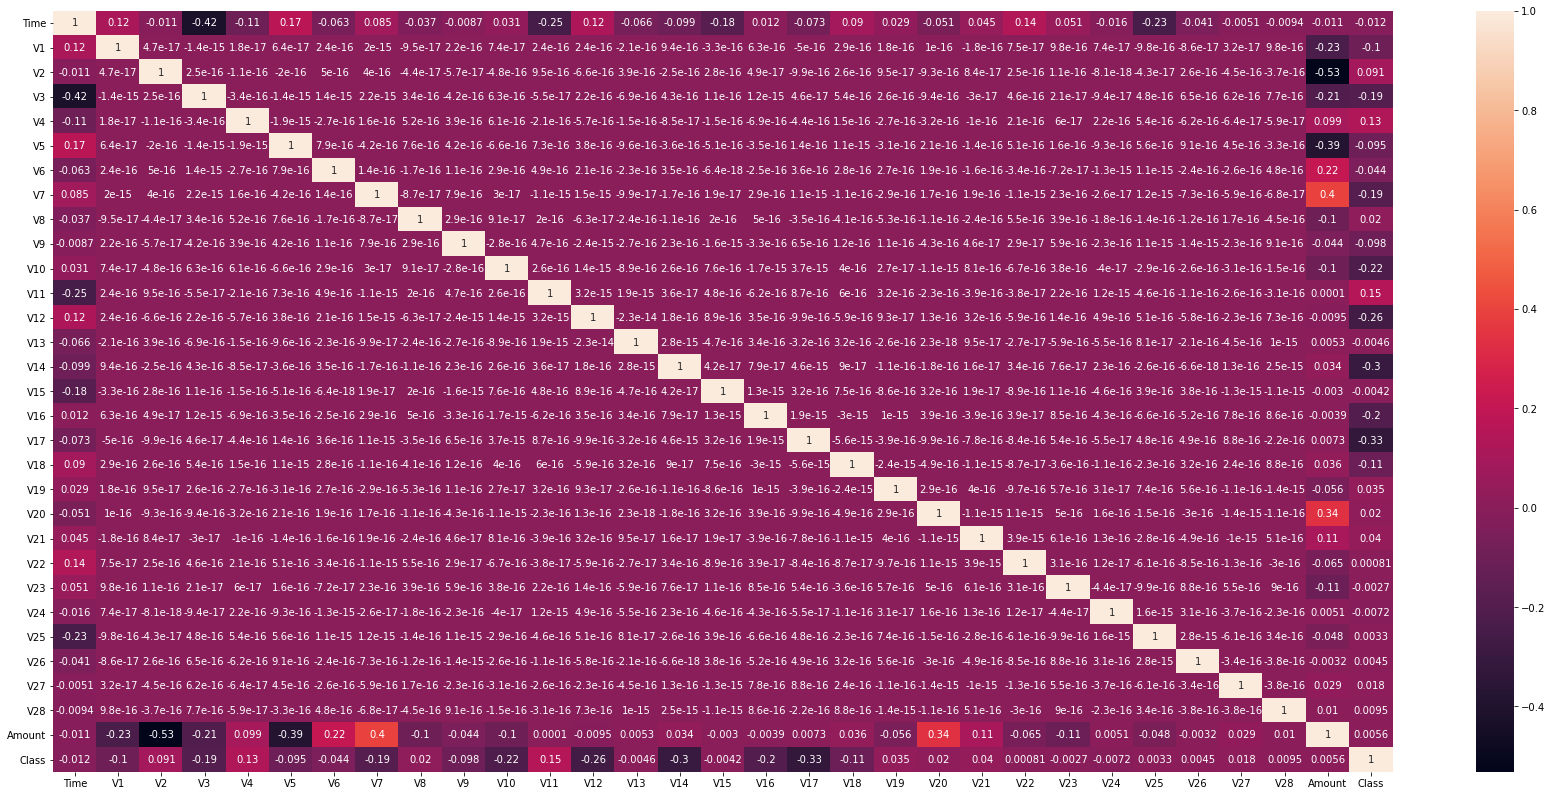

In [15]:
plt.figure(figsize=(30,14))
sns.heatmap(df.corr(), annot=True)

There is very low collinearity present among features so we can proceed with all features for our initial model building. 
Low collinearity seems to be there as the data is already PCA transformed.

## 3. Splitting the data into train & test data

Let's split the data into training and test sets. Take 70% data for training and remaining for test purpose. Use class column for stratification so we get proper splitted data based on class.

In [16]:
X = df.drop(['Class'], axis = 1)
y= df['Class']

In [17]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, stratify = y, random_state = 100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [18]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


In [19]:
y_train.shape, y_test.shape

((199364,), (85443,))

In [20]:
y_train.value_counts()/len(y_train)

0    0.998275
1    0.001725
Name: Class, dtype: float64

In [21]:
y_test.value_counts()/len(y_test)

0    0.998268
1    0.001732
Name: Class, dtype: float64

In [22]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
columns = X_train.columns

X_train = pd.DataFrame(Scaler_X.fit_transform(X_train), columns = columns)
X_test = pd.DataFrame(Scaler_X.transform(X_test), columns = columns)

#### Plotting the distribution of few variables to see the skewness

(array([2.84395e+05, 3.60000e+02, 3.60000e+01, 1.00000e+01, 2.00000e+00,
        1.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0.   ,  2569.116,  5138.232,  7707.348, 10276.464, 12845.58 ,
        15414.696, 17983.812, 20552.928, 23122.044, 25691.16 ]),
 <a list of 10 Patch objects>)

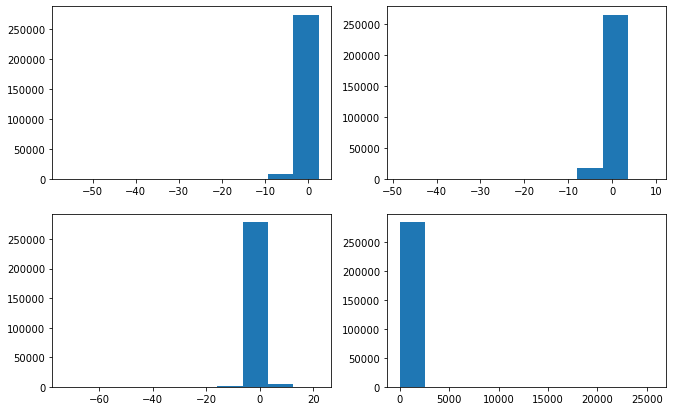

In [23]:
# plot the histogram of a variable from the dataset to see the skewness
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(11, 7))
axs[0,0].hist(df.V1)
axs[1,0].hist(df.V2)
axs[0,1].hist(df.V3)
axs[1,1].hist(df.Amount)

#### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [24]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer

pt = preprocessing.PowerTransformer(copy=False)
PWTR_X = pt.fit_transform(X)

In [25]:
# Splitting dataset into test and train sets in 70:30 ratio after applying Power Transform
from sklearn.model_selection import StratifiedShuffleSplit

kfold = 4
sss = StratifiedShuffleSplit(n_splits=kfold, test_size=0.3, random_state=9487)
for train_index, test_index in sss.split(PWTR_X, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = PWTR_X[train_index], PWTR_X[test_index]
        y_train, y_test = y[train_index], y[test_index]

TRAIN: [129141  91689 118805 ... 249655  69488 188068] TEST: [ 32603  71580 144362 ... 120664 260883 146701]
TRAIN: [179661 129498 253513 ... 261021 275137 199709] TEST: [ 30193  96420  28988 ... 159837 243770  87245]
TRAIN: [ 55609 250907 105943 ...  96700  41174 261733] TEST: [ 97330 182828 138896 ... 103047 280031 252278]
TRAIN: [160541 270383   7914 ... 119570 142561 116811] TEST: [199984 152508 204491 ... 203781  88156  52492]


(array([1.6000e+01, 2.1000e+01, 4.0000e+01, 9.5000e+01, 4.6800e+02,
        7.1730e+03, 8.3029e+04, 8.8744e+04, 1.9020e+04, 7.5800e+02]),
 array([-10.13311246,  -8.70550121,  -7.27788996,  -5.85027871,
         -4.42266746,  -2.99505621,  -1.56744496,  -0.13983371,
          1.28777754,   2.71538879,   4.14300004]),
 <a list of 10 Patch objects>)

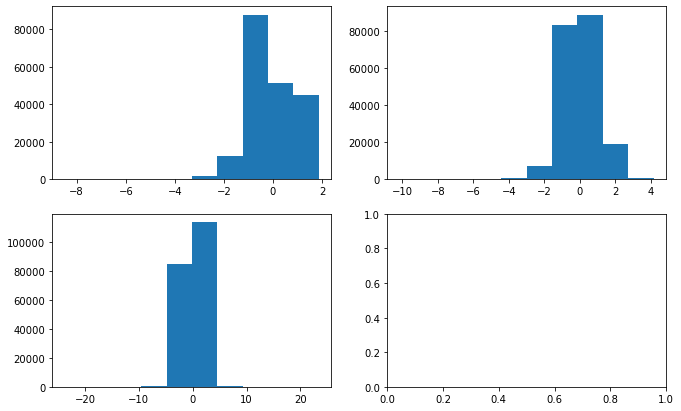

In [26]:
# plot the histogram of a variable from the dataset again to check the skewness
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(11, 7))
X_train = pd.DataFrame(X_train, columns = columns)
X_train.head()
axs[0,0].hist(X_train.V1)
axs[1,0].hist(X_train.V2)
axs[0,1].hist(X_train.V3)

## 4. Model Building
- Build different models on the imbalanced dataset and see the result

In [46]:
##Create few lists to store the metrics for every model.
model = list()
resample = list()
Precision = list()
Recall = list()
F1score = list()
AUCROC = list()

Let's create a method which can take model and data as input and append the evaluation scores.

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

def test_eval_model(clf_model, X_test, y_test, algo = None, sampling = None):
    y_pred = clf_model.predict(X_test)
    y_pred_prob = clf_model.predict_proba(X_test)
    
    print('Confusion matrix')
    print('='*15)
    print(confusion_matrix(y_test, y_pred), '\n')
    print('roc_auc score')
    print(roc_auc_score(y_test, y_pred_prob[:, 1]), '\n')
    print('Classification report')
    print('='*55)
    print(classification_report(y_test, y_pred))
    
    model.append(algo)
    resample.append(sampling)
    Precision.append('{:.2f}'.format(precision_score(y_test, y_pred)))
    Recall.append('{:.2f}'.format(recall_score(y_test, y_pred)))
    F1score.append('{:.2f}'.format(f1_score(y_test, y_pred)))
    AUCROC.append('{:.2f}'.format(roc_auc_score(y_test, y_pred_prob[:, 1])))

### a) Logistic Regression

In [570]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
params = {'penalty' : ['l1', 'l2'], 'C' : [0.5, 1, 2, 3, 5, 10]}

log_reg = RandomizedSearchCV(LogisticRegression(), params, cv=cv, scoring='roc_auc', n_jobs = -1, verbose = 2)
log_reg.fit(X_train, y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   23.5s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.5, 1, 2, 3, 5, 10],
                                        'penalty': ['l1', 'l2']},
                   scoring='roc_auc', verbose=2)

In [571]:
print("Logistic classification Best AUC : ", log_reg.best_score_)
print("Logistic classification Best hyperparameters: ", log_reg.best_params_)

Logistic classification Best AUC :  0.9795526007959033
Logistic classification Best hyperparameters:  {'penalty': 'l2', 'C': 0.5}


In [572]:
test_eval_model(log_reg, X_test, y_test, 'Logistic Regression')

Confusion matrix
[[85280    15]
 [   59    89]] 

roc_auc score
0.9662103542078921 

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.60      0.71       148

    accuracy                           1.00     85443
   macro avg       0.93      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443



### b) KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

cv = StratifiedKFold(n_splits=3, random_state=100, shuffle=True)
params = {'n_neighbors' : [2, 5], 'weights' : ['uniform', 'distance']}

knn_model = RandomizedSearchCV(KNeighborsClassifier(), params, cv=cv, scoring='roc_auc', n_jobs = -1, verbose = 2)
knn_model.fit(X_train, y_train) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed: 10.5min remaining: 21.0min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 22.5min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
                   estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': [2, 5],
                                        'weights': ['uniform', 'distance']},
                   scoring='roc_auc', verbose=2)

In [37]:
print("KNN classification best AUC : ", knn_model.best_score_)
print("KNN classification best hyperparameters: ", knn_model.best_params_)

KNN classification best AUC :  0.924343621272841
KNN classification best hyperparameters:  {'weights': 'distance', 'n_neighbors': 5}


In [38]:
test_eval_model(knn_model, X_test, y_test, 'KNN')

Confusion matrix
[[85286     9]
 [   42   106]] 

roc_auc score
0.9052822240142717 

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.92      0.72      0.81       148

    accuracy                           1.00     85443
   macro avg       0.96      0.86      0.90     85443
weighted avg       1.00      1.00      1.00     85443



### c) SVM

In [575]:
from sklearn.svm import SVC

In [ ]:
params = {'C' : [1 , 5], 'gamma' : [.01, 1], 'kernel' : ['rbf']}

cv = StratifiedKFold(n_splits=3, random_state=100, shuffle=True)
svc_model = RandomizedSearchCV(SVC(probability = True), params, cv=cv, scoring='roc_auc', n_jobs = -1, verbose = 2)
svc_model.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:  4.6min remaining:  9.2min


In [ ]:
print("SVM classification best AUC : ", svc_model.best_score_)
print("SVM classification best hyperparameters: ", svc_model.best_params_)

In [ ]:
test_eval_model(svc_model, X_test, y_test, 'SVM')

### c) Decision Tree

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
params = {'max_depth' : [5 , 10, 15], 'min_samples_split' : [5, 10, 15], 'min_samples_leaf' : [2, 5, 10]}
cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

tree_model = RandomizedSearchCV(DecisionTreeClassifier(), params, cv=cv, scoring='roc_auc', n_jobs = -1, verbose = 2)
tree_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15],
                                        'min_samples_leaf': [2, 5, 10],
                                        'min_samples_split': [5, 10, 15]},
                   scoring='roc_auc', verbose=2)

In [100]:
print("Decision tree classification best AUC : ", tree_model.best_score_)
print("Decision tree classification best hyperparameters: ", tree_model.best_params_)

Decision tree classification best AUC :  0.9236965210948824
Decision tree classification best hyperparameters:  {'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 15}


In [101]:
test_eval_model(tree_model, X_test, y_test, 'Decision Tree')

Confusion matrix
[[85282    13]
 [   49    99]] 

roc_auc score
0.9116799327611801 

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.67      0.76       148

    accuracy                           1.00     85443
   macro avg       0.94      0.83      0.88     85443
weighted avg       1.00      1.00      1.00     85443



### d) Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
params = {'max_depth' : [5 , 10, 15], 'min_samples_split' : [5, 10, 15], 'min_samples_leaf' : [2, 5, 10]}

cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
random_forest_model = RandomizedSearchCV(RandomForestClassifier(), params, cv=cv, scoring='roc_auc', n_jobs = -1, verbose = 2)
random_forest_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 17.6min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15],
                                        'min_samples_leaf': [2, 5, 10],
                                        'min_samples_split': [5, 10, 15]},
                   scoring='roc_auc', verbose=2)

In [104]:
print("Random forest best AUC : ", random_forest_model.best_score_)
print("Random forest hyperparameters: ", random_forest_model.best_params_)

Random forest best AUC :  0.9846298985660598
Random forest hyperparameters:  {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 15}


In [105]:
test_eval_model(random_forest_model, X_test, y_test, 'Random Forest')

Confusion matrix
[[85289     6]
 [   45   103]] 

roc_auc score
0.9624322898430409 

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.70      0.80       148

    accuracy                           1.00     85443
   macro avg       0.97      0.85      0.90     85443
weighted avg       1.00      1.00      1.00     85443



### e) XGBoost

In [397]:
from xgboost import XGBClassifier
import xgboost as xgb

In [406]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [1, 1.5, 2, 5],
        'max_depth': [3, 4, 5]
        }

cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
xgboost_model = RandomizedSearchCV(XGBClassifier(), params, cv=cv, scoring='roc_auc', n_jobs = -1, verbose = 2)
xgboost_model.fit(X_train.values, y_train.values)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 13.2min finished


[15:33:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=N

In [403]:
print("XG boost Best hyperparameters: ", xgboost_model.best_params_)

XG boost Best AUC :  0.9834638235452611
XG boost Best hyperparameters:  {'min_child_weight': 10, 'max_depth': 3, 'gamma': 2}


In [407]:
test_eval_model(xgboost_model, X_test, y_test, 'XGBoost')

Confusion matrix
[[85290     5]
 [   41   107]] 

roc_auc score
0.9704059678413391 

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.72      0.82       148

    accuracy                           1.00     85443
   macro avg       0.98      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443



#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

Out of above 6 models, XGBoost showed the best results with 0.97 roc_auc, 0.72 recall and 0.82 F1 score. Let's build model for XGBoost. Since the data is highly imbalanced, we would be using recall and ROC AUC metric.

In [538]:
clf = XGBClassifier(min_child_weight = 10, max_depth = 3, gamma = 2)
clf.fit(X_train.values, y_train.values)
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)
    
#print the evaluation score on the X_test by choosing the best evaluation metric
print('Confusion matrix')
print('='*15)
print(confusion_matrix(y_test, y_pred), '\n')
print('ROC AUC score')
print(roc_auc_score(y_test, y_pred_prob[:, 1]), '\n')
print('Recall Score')
print(recall_score(y_test, y_pred))  

[17:59:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion matrix
[[85290     5]
 [   41   107]] 

ROC AUC score
0.9704059678413391 

Recall Score
0.722972972972973


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 18
2nd Top var = 15
3rd Top var = 11


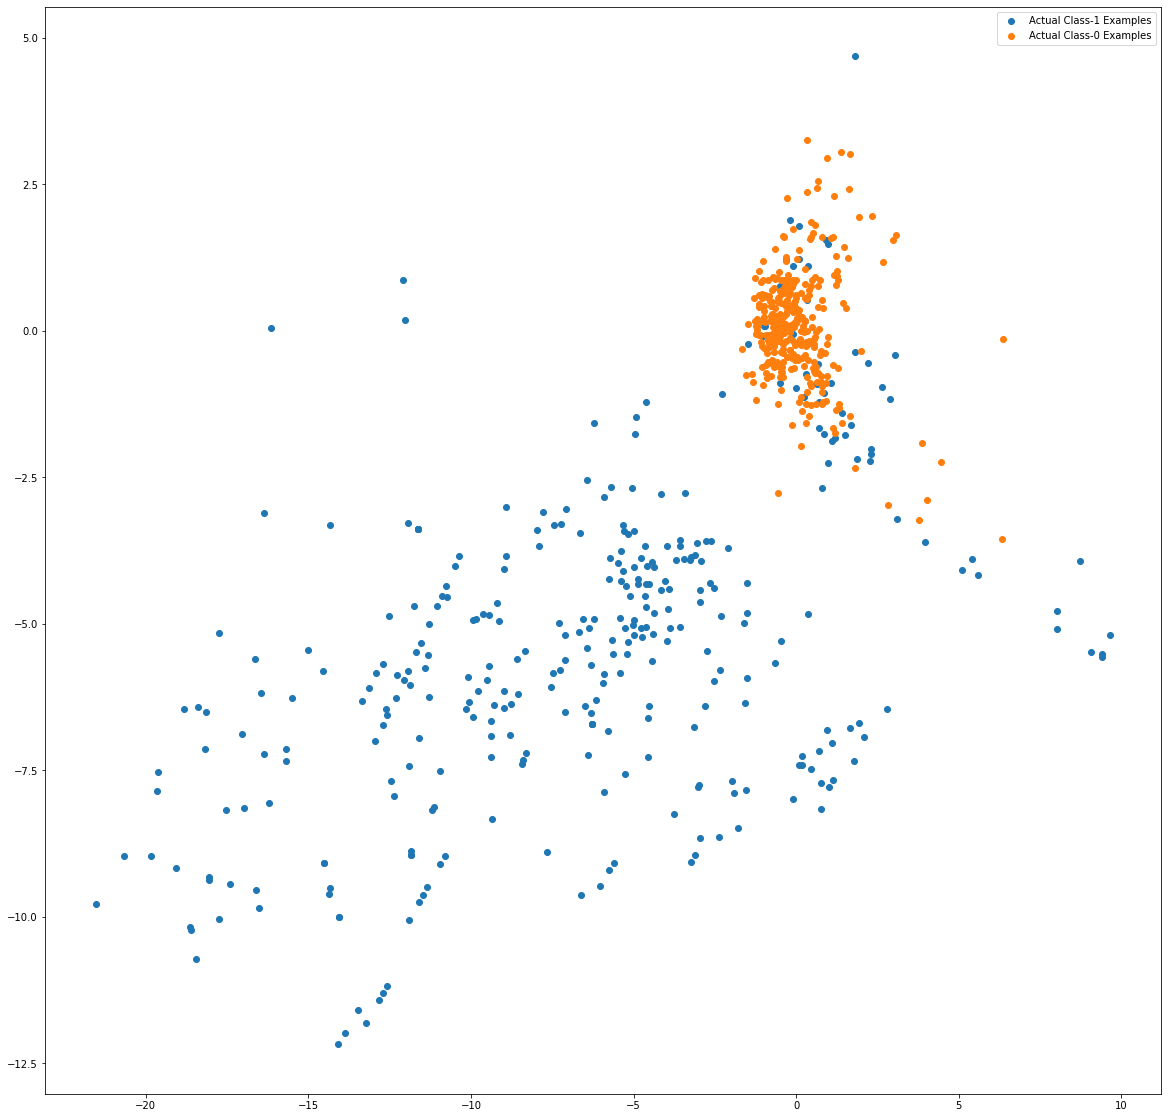

In [539]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
    
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

#Variable on Index-18 and Index-15 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

### Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## 5. Random Oversampling and model building

In [437]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

counter = Counter(y_train)
print('Before',counter)

random_sampler = RandomOverSampler()
X_train_sm, y_train_sm = random_sampler.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 199020, 1: 344})
After Counter({0: 199020, 1: 199020})


### Model Building
- Let's build different models on the balanced dataset and see the results.

### a) Logistic Regression

In [282]:
log_reg.fit(X_train_sm, y_train_sm) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   28.5s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.5, 1, 2, 3, 5, 10],
                                        'penalty': ['l1', 'l2']},
                   scoring='roc_auc', verbose=2)

In [283]:
print("Logistic classification with random oversampling Best AUC : ", log_reg.best_score_)
print("Logistic classification with random oversampling Best hyperparameters: ", log_reg.best_params_)

Logistic classification with random oversampling Best AUC :  0.9910811050976234
Logistic classification with random oversampling Best hyperparameters:  {'penalty': 'l2', 'C': 10}


In [284]:
test_eval_model(log_reg, X_test, y_test, 'Logistic Regression', 'Random Oversampling')

Confusion matrix
[[83271  2024]
 [   14   134]] 

roc_auc score
0.9663542110608176 

Classification report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.91      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.98      0.99     85443



### b) KNN

In [112]:
knn_model.fit(X_train_sm, y_train_sm) 

Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed: 13.7min remaining: 27.4min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 27.3min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
                   estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': [2, 5],
                                        'weights': ['uniform', 'distance']},
                   scoring='roc_auc', verbose=2)

In [113]:
print("KNN classification with random oversampling best AUC : ", knn_model.best_score_)
print("KNN classification with random oversampling best hyperparameters: ", knn_model.best_params_)

KNN classification with random oversampling best AUC :  0.9998392121394835
KNN classification with random oversampling best hyperparameters:  {'weights': 'uniform', 'n_neighbors': 2}


In [114]:
test_eval_model(knn_model, X_test, y_test, 'KNN', 'Random Oversampling')

Confusion matrix
[[85280    15]
 [   37   111]] 

roc_auc score
0.8951567928794026 

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.75      0.81       148

    accuracy                           1.00     85443
   macro avg       0.94      0.87      0.90     85443
weighted avg       1.00      1.00      1.00     85443



### c) Decision Tree

In [115]:
tree_model.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.9min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15],
                                        'min_samples_leaf': [2, 5, 10],
                                        'min_samples_split': [5, 10, 15]},
                   scoring='roc_auc', verbose=2)

In [116]:
print("Decision tree classification with random oversampling best AUC : ", tree_model.best_score_)
print("Decision tree classification with random oversampling best hyperparameters: ", tree_model.best_params_)

Decision tree classification with random oversampling best AUC :  0.9997059941770144
Decision tree classification with random oversampling best hyperparameters:  {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 15}


In [117]:
test_eval_model(tree_model, X_test, y_test, 'Decision Tree', 'Random Oversampling')

Confusion matrix
[[85093   202]
 [   44   104]] 

roc_auc score
0.8507338600691083 

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.34      0.70      0.46       148

    accuracy                           1.00     85443
   macro avg       0.67      0.85      0.73     85443
weighted avg       1.00      1.00      1.00     85443



### d) Random Forest

In [118]:
random_forest_model.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 25.4min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15],
                                        'min_samples_leaf': [2, 5, 10],
                                        'min_samples_split': [5, 10, 15]},
                   scoring='roc_auc', verbose=2)

In [119]:
print("Random forest with random oversampling best AUC : ", random_forest_model.best_score_)
print("Random forest with random oversampling hyperparameters: ", random_forest_model.best_params_)

Random forest with random oversampling best AUC :  0.9999959297088747
Random forest with random oversampling hyperparameters:  {'min_samples_split': 15, 'min_samples_leaf': 2, 'max_depth': 15}


In [120]:
test_eval_model(random_forest_model, X_test, y_test, 'Random Forest', 'Random Oversampling')

Confusion matrix
[[85283    12]
 [   42   106]] 

roc_auc score
0.9631949450476327 

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.72      0.80       148

    accuracy                           1.00     85443
   macro avg       0.95      0.86      0.90     85443
weighted avg       1.00      1.00      1.00     85443



### e) XGBoost

In [440]:
xgboost_model.fit(X_train_sm.values, y_train_sm.values)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 22.2min finished


[16:05:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=N

In [441]:
print("XG boost with random oversampling Best AUC : ", xgboost_model.best_score_)
print("XG boost with random oversampling Best hyperparameters: ", xgboost_model.best_params_)

XG boost with random oversampling Best AUC :  0.9999922749171674
XG boost with random oversampling Best hyperparameters:  {'min_child_weight': 10, 'max_depth': 4, 'gamma': 1.5}


In [442]:
test_eval_model(xgboost_model, X_test, y_test, 'XGBoost', 'Random Oversampling')

Confusion matrix
[[85279    16]
 [   35   113]] 

roc_auc score
0.9711963091528131 

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.76      0.82       148

    accuracy                           1.00     85443
   macro avg       0.94      0.88      0.91     85443
weighted avg       1.00      1.00      1.00     85443



## 6. SMOTE oversampling and model building

### Print the class distribution after applying SMOTE 

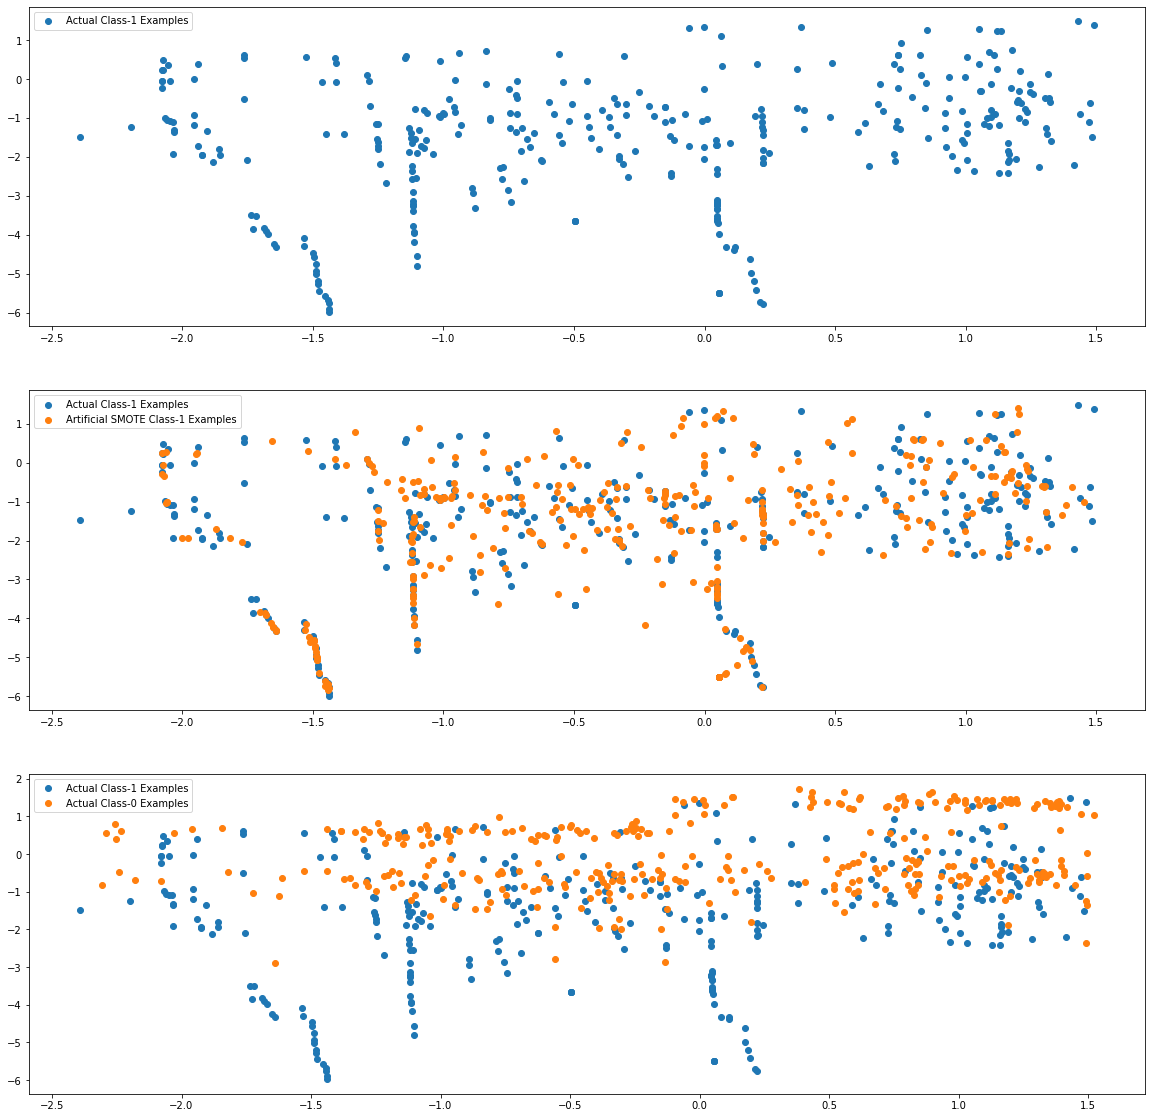

In [50]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]
X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.to_numpy()[:X_train_1.shape[0], 0], X_train_smote_1.to_numpy()[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Model Building

- Let's build different models on the balanced dataset and see the results.

### a) Logistic Regression

In [313]:
log_reg.fit(X_train_smote, y_train_smote) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   24.3s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.5, 1, 2, 3, 5, 10],
                                        'penalty': ['l1', 'l2']},
                   scoring='roc_auc', verbose=2)

In [314]:
print("Logistic classification with SMOTE Best AUC : ", log_reg.best_score_)
print("Logistic classification with SMOTE Best hyperparameters: ", log_reg.best_params_)

Logistic classification with SMOTE Best AUC :  0.9927266884288132
Logistic classification with SMOTE Best hyperparameters:  {'penalty': 'l2', 'C': 10}


In [315]:
test_eval_model(log_reg, X_test, y_test, 'Logistic Regression', 'SMOTE')

Confusion matrix
[[83073  2222]
 [   14   134]] 

roc_auc score
0.9637935036273156 

Classification report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85295
           1       0.06      0.91      0.11       148

    accuracy                           0.97     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.97      0.99     85443



### b) KNN

In [316]:
knn_model.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed: 16.0min remaining: 32.0min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 29.0min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
                   estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': [2, 5],
                                        'weights': ['uniform', 'distance']},
                   scoring='roc_auc', verbose=2)

In [317]:
print("KNN classification with SMOTE best AUC : ", knn_model.best_score_)
print("KNN classification with SMOTE best hyperparameters: ", knn_model.best_params_)

KNN classification with SMOTE best AUC :  0.9995578333835796
KNN classification with SMOTE best hyperparameters:  {'weights': 'uniform', 'n_neighbors': 5}


In [318]:
test_eval_model(knn_model, X_test, y_test, 'KNN', 'SMOTE')

Confusion matrix
[[85151   144]
 [   27   121]] 

roc_auc score
0.9149767975373228 

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.46      0.82      0.59       148

    accuracy                           1.00     85443
   macro avg       0.73      0.91      0.79     85443
weighted avg       1.00      1.00      1.00     85443



### c) Decision Tree

In [319]:
tree_model.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  5.0min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15],
                                        'min_samples_leaf': [2, 5, 10],
                                        'min_samples_split': [5, 10, 15]},
                   scoring='roc_auc', verbose=2)

In [320]:
print("Decision tree classification with SMOTE best AUC : ", tree_model.best_score_)
print("Decision tree classification with SMOTE best hyperparameters: ", tree_model.best_params_)

Decision tree classification with SMOTE best AUC :  0.998569873598601
Decision tree classification with SMOTE best hyperparameters:  {'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 15}


In [321]:
test_eval_model(tree_model, X_test, y_test, 'Decision Tree', 'SMOTE')

Confusion matrix
[[84781   514]
 [   34   114]] 

roc_auc score
0.8863888523613594 

Classification report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.18      0.77      0.29       148

    accuracy                           0.99     85443
   macro avg       0.59      0.88      0.65     85443
weighted avg       1.00      0.99      1.00     85443



### d) Random Forest

In [322]:
random_forest_model.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 39.1min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15],
                                        'min_samples_leaf': [2, 5, 10],
                                        'min_samples_split': [5, 10, 15]},
                   scoring='roc_auc', verbose=2)

In [323]:
print("Random forest with SMOTE best AUC : ", random_forest_model.best_score_)
print("Random forest with SMOTE hyperparameters: ", random_forest_model.best_params_)

Random forest with SMOTE best AUC :  0.9999883890540081
Random forest with SMOTE hyperparameters:  {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 15}


In [324]:
test_eval_model(random_forest_model, X_test, y_test, 'Random Forest', 'SMOTE')

Confusion matrix
[[85252    43]
 [   34   114]] 

roc_auc score
0.9775710055562333 

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.73      0.77      0.75       148

    accuracy                           1.00     85443
   macro avg       0.86      0.88      0.87     85443
weighted avg       1.00      1.00      1.00     85443



### e) XGBoost

In [471]:
xgboost_model.fit(X_train_smote.values, y_train_smote.values)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 32.7min finished


[16:42:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=N

In [472]:
print("XG boost with SMOTE Best AUC : ", xgboost_model.best_score_)
print("XG boost with SMOTE Best hyperparameters: ", xgboost_model.best_params_)

XG boost with SMOTE Best AUC :  0.9999898440278174
XG boost with SMOTE Best hyperparameters:  {'min_child_weight': 10, 'max_depth': 5, 'gamma': 1.5}


In [473]:
test_eval_model(xgboost_model, X_test, y_test, 'XGBoost', 'SMOTE')

Confusion matrix
[[85247    48]
 [   34   114]] 

roc_auc score
0.9734362696713948 

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.70      0.77      0.74       148

    accuracy                           1.00     85443
   macro avg       0.85      0.88      0.87     85443
weighted avg       1.00      1.00      1.00     85443



## 7. ADASYN oversampling and model building

### Print the class distribution after applying ADASYN

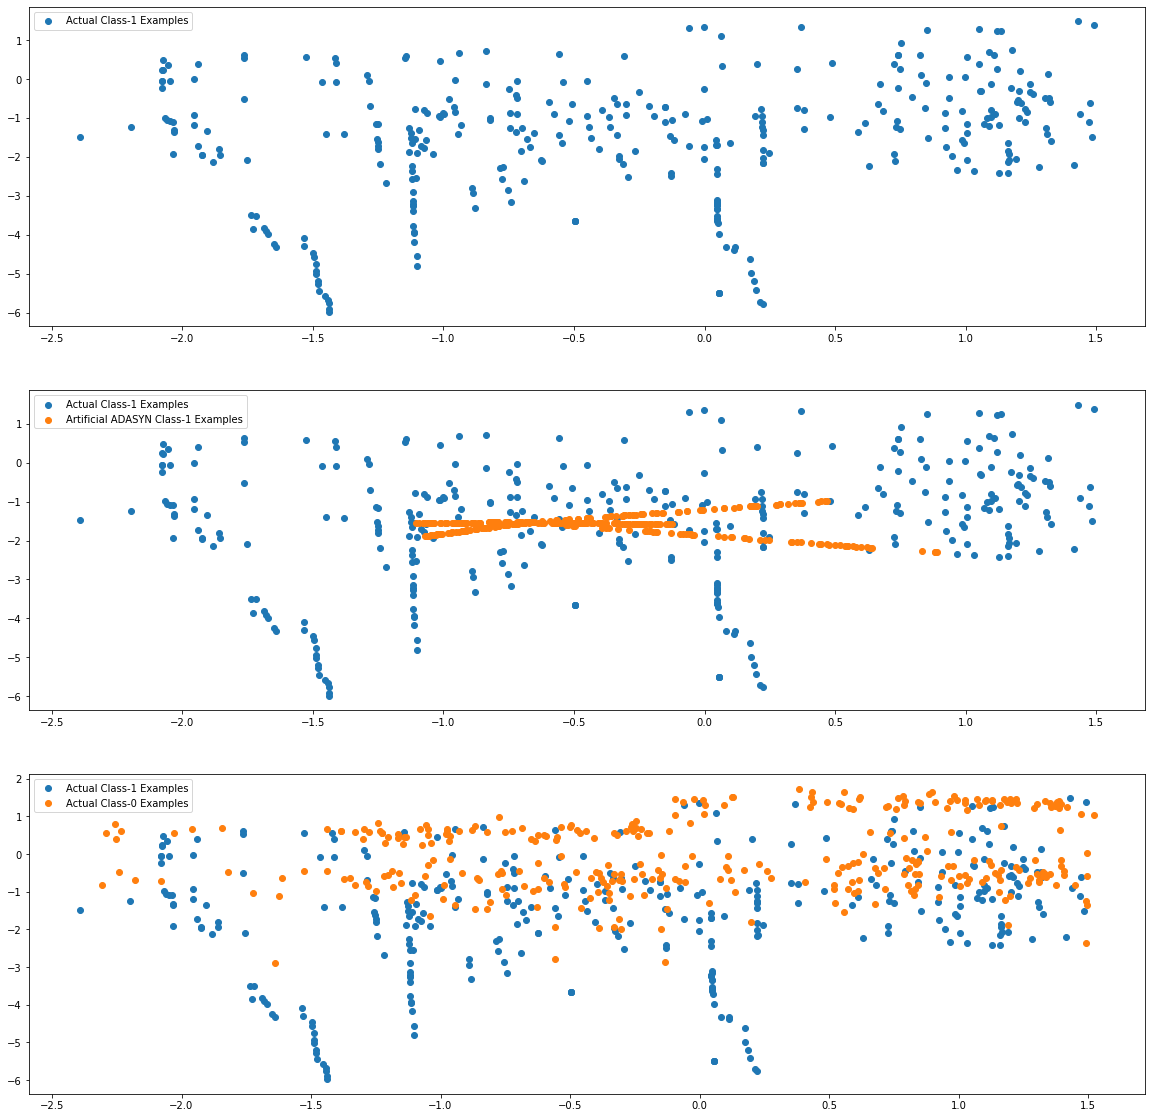

In [28]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.to_numpy()[:X_train_1.shape[0], 0], X_train_adasyn_1.to_numpy()[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Model Building

- Let's build different models on the balanced dataset and see the results.

### a) Logistic Regression

In [356]:
log_reg.fit(X_train_adasyn, y_train_adasyn) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   41.3s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.5, 1, 2, 3, 5, 10],
                                        'penalty': ['l1', 'l2']},
                   scoring='roc_auc', verbose=2)

In [357]:
print("Logistic classification with Adasyn Best AUC : ", log_reg.best_score_)
print("Logistic classification with Adasyn Best hyperparameters: ", log_reg.best_params_)

Logistic classification with Adasyn Best AUC :  0.9734308043770193
Logistic classification with Adasyn Best hyperparameters:  {'penalty': 'l2', 'C': 10}


In [358]:
test_eval_model(log_reg, X_test, y_test, 'Logistic Regression', 'ADASYN')

Confusion matrix
[[78047  7248]
 [   13   135]] 

roc_auc score
0.964803511818284 

Classification report
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     85295
           1       0.02      0.91      0.04       148

    accuracy                           0.92     85443
   macro avg       0.51      0.91      0.50     85443
weighted avg       1.00      0.92      0.95     85443



### b) KNN

In [359]:
knn_model.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed: 14.5min remaining: 28.9min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 27.8min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
                   estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': [2, 5],
                                        'weights': ['uniform', 'distance']},
                   scoring='roc_auc', verbose=2)

In [360]:
print("KNN classification with Adasyn best AUC : ", knn_model.best_score_)
print("KNN classification with Adasyn best hyperparameters: ", knn_model.best_params_)

KNN classification with Adasyn best AUC :  0.9995427595216562
KNN classification with Adasyn best hyperparameters:  {'weights': 'distance', 'n_neighbors': 2}


In [361]:
test_eval_model(knn_model, X_test, y_test, 'KNN', 'ADASYN')

Confusion matrix
[[85238    57]
 [   32   116]] 

roc_auc score
0.9050048084311524 

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.67      0.78      0.72       148

    accuracy                           1.00     85443
   macro avg       0.84      0.89      0.86     85443
weighted avg       1.00      1.00      1.00     85443



### c) Decision Tree

In [362]:
tree_model.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.6min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15],
                                        'min_samples_leaf': [2, 5, 10],
                                        'min_samples_split': [5, 10, 15]},
                   scoring='roc_auc', verbose=2)

In [363]:
print("Decision tree classification with Adasyn best AUC : ", tree_model.best_score_)
print("Decision tree classification with Adasyn best hyperparameters: ", tree_model.best_params_)

Decision tree classification with Adasyn best AUC :  0.9971823545779083
Decision tree classification with Adasyn best hyperparameters:  {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 15}


In [364]:
test_eval_model(tree_model, X_test, y_test, 'Decision Tree', 'ADASYN')

Confusion matrix
[[84347   948]
 [   37   111]] 

roc_auc score
0.8922571979917076 

Classification report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.10      0.75      0.18       148

    accuracy                           0.99     85443
   macro avg       0.55      0.87      0.59     85443
weighted avg       1.00      0.99      0.99     85443



### d) Random Forest

In [365]:
random_forest_model.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 25.7min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15],
                                        'min_samples_leaf': [2, 5, 10],
                                        'min_samples_split': [5, 10, 15]},
                   scoring='roc_auc', verbose=2)

In [366]:
print("Random forest with Adasyn best AUC : ", random_forest_model.best_score_)
print("Random forest with Adasyn hyperparameters: ", random_forest_model.best_params_)

Random forest with Adasyn best AUC :  0.9999734251765344
Random forest with Adasyn hyperparameters:  {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 15}


In [367]:
test_eval_model(random_forest_model, X_test, y_test, 'Random Forest', 'ADASYN')

Confusion matrix
[[85075   220]
 [   34   114]] 

roc_auc score
0.9818903947032793 

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.34      0.77      0.47       148

    accuracy                           1.00     85443
   macro avg       0.67      0.88      0.74     85443
weighted avg       1.00      1.00      1.00     85443



### e) XGBoost

In [38]:
xgboost_model.fit(X_train_adasyn.values, y_train_adasyn.values)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 35.6min finished


[21:05:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=N

In [39]:
print("XG boost with Adasyn Best AUC : ", xgboost_model.best_score_)
print("XG boost with Adasyn Best hyperparameters: ", xgboost_model.best_params_)

XG boost with Adasyn Best AUC :  0.9999880704146242
XG boost with Adasyn Best hyperparameters:  {'min_child_weight': 5, 'max_depth': 5, 'gamma': 1.5}


In [40]:
test_eval_model(xgboost_model, X_test, y_test, 'XGBoost', 'ADASYN')

Confusion matrix
[[85235    60]
 [   33   115]] 

roc_auc score
0.9751962980625271 

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.66      0.78      0.71       148

    accuracy                           1.00     85443
   macro avg       0.83      0.89      0.86     85443
weighted avg       1.00      1.00      1.00     85443



## 8. Final Analysis and conclusion

In [48]:
clf_eval_df = pd.DataFrame({'model':model,
                            'resample':resample,
                            'precision':Precision,
                            'recall':Recall,
                            'f1-score':F1score,
                            'AUC-ROC':AUCROC})

In [49]:
clf_eval_df

,model,resample,precision,recall,f1-score,AUC-ROC
0,Logistic Regression,None,0.86,0.60,0.71,0.97
1,KNN,None,0.92,0.72,0.81,0.91
2,Decision Tree,None,0.88,0.67,0.76,0.91
3,Random Forest,None,0.94,0.70,0.80,0.96
4,XGBoost,None,0.96,0.72,0.82,0.97
5,Logistic Regression,Random Oversampling,0.06,0.91,0.12,0.97
6,KNN,Random Oversampling,0.88,0.75,0.81,0.90
7,Decision Tree,Random Oversampling,0.34,0.70,0.46,0.85
8,Random Forest,Random Oversampling,0.90,0.72,0.80,0.96
9,XGBoost,Random Oversampling,0.88,0.76,0.82,0.97


### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In nutshell rather than aiming for overall accuracy on the entire dataset, we focused more on detecting most of the fraud cases (recall), while keeping the cost at which this is achieved under control (precision). We got the best evaluation metrices when applied Random Forest on Smote data.

In [74]:
# perform the best oversampling method on X_train & y_train
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
clf = RandomForestClassifier(min_samples_split = 10, min_samples_leaf = 5, max_depth = 15)  #initialise the model with optimum hyperparameters
clf.fit(X_train_smote, y_train_smote) # fit on the balanced dataset

y_pred = clf.predict(X_test)

#print the evaluation score on the X_test by choosing the best evaluation metric
print('Confusion matrix')   
print('='*15)
print(confusion_matrix(y_test, y_pred), '\n')
print('ROC AUC score')
print(roc_auc_score(y_test, y_pred), '\n')
print('Recall Score')
print(recall_score(y_test, y_pred), '\n') 
print('Precision Score')
print(precision_score(y_test, y_pred)) 

Confusion matrix
[[85245    50]
 [   35   113]] 

ROC AUC score
0.8814636563405541 

Recall Score
0.7635135135135135 

Precision Score
0.6932515337423313


### Print the important features of the best model to understand the dataset

Top var = 15
2nd Top var = 11
3rd Top var = 13


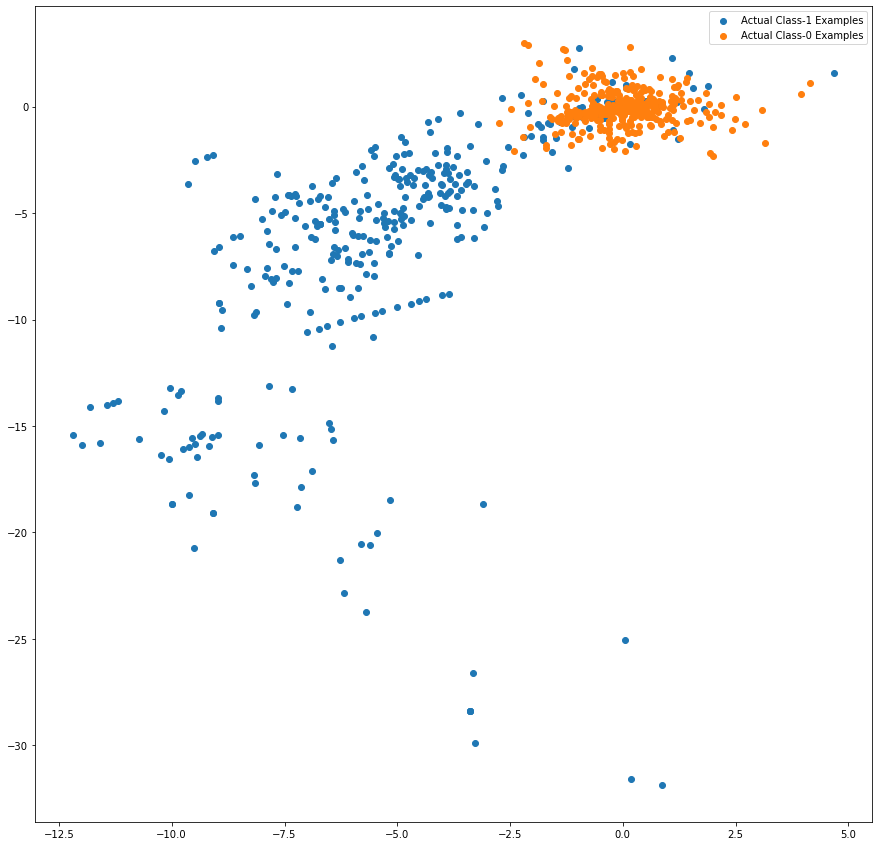

In [58]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-15 and Index-11 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 15]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

Text(0, 0.5, 'True Positive Rate')

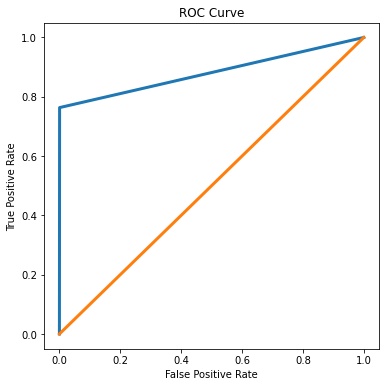

In [75]:
#### Print the FPR,TPR & select the best threshold from the roc curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
metrics.roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, linewidth=3, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=3)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [77]:
print('Train auc =', metrics.roc_auc_score(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.8814636563405541
1


The data provided to us was very imbalanced data set. Hence, for building a proper model on top of that we have used some balancing techniques like Random Oversampling ,SMOTE, ADASYN etc to balance the data and applied some of very popular models like Random Forest, KNN and some boosting techniques like XGBoost to catch any fraudelent transactions.

For this project Accuracy was not a concerning Evaluation criteria and hence we focussed more on Recall and AUC.
We finally able to build a proper logistic model and predicted on test data and the results were satisfying.
We were also able to figure out the variables which are important in detecting any fraud transactions.